The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

In [41]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, classification_report, recall_score, accuracy_score, f1_score
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt


import time

In [15]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [16]:
#original dataframe
bank_marketingDF = bank_marketing.data.original

In [17]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN


In [18]:
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [19]:
#drop 'contact' column as it likely has no impact to the analysis
X = X.drop('contact', axis=1)

In [20]:
X

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,NaN
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,NaN
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0,NaN


Classifiers compared

C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

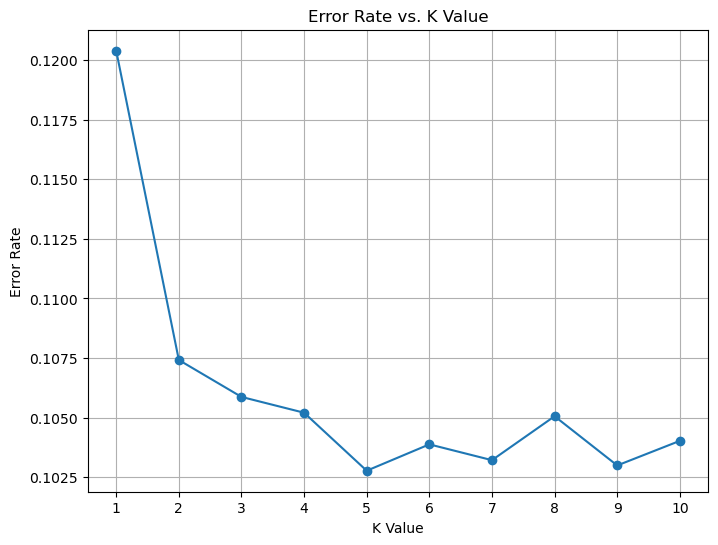

In [49]:
# Identification of best K value for KNN

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building a preprocessing pipeline
numericalCols = X.select_dtypes(include=['int64', 'float64']).columns
categoricalCols = X.select_dtypes(include=['object']).columns

#define separate pipelines for numerical and categorical features.
preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), numericalCols),
                  ('cat', OneHotEncoder(handle_unknown='ignore'), categoricalCols)])
model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', KNeighborsClassifier(n_neighbors=5))])

k_values = range(1, 11) # Test k from 1 to 10
error_rates = []

for k in k_values:
    model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', KNeighborsClassifier(n_neighbors=k))])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error_rate)

plt.figure(figsize=(8, 6))
plt.plot(k_values, error_rates, marker='o')
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [55]:
#Models to evaluate, KNN (use 5 as K value), Logistic Regression, Decision Trees, SVM
classification = ['KNN', 'LogisticRegression', 'DecisionTreeClassifier', 'SVM']

#initialize empty dataframe
classificationDF = pd.DataFrame()

#Train test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building a preprocessing pipeline
numericalCols = X.select_dtypes(include=['int64', 'float64']).columns
categoricalCols = X.select_dtypes(include=['object']).columns

#define separate pipelines for numerical and categorical features.
preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), numericalCols),
                  ('cat', OneHotEncoder(handle_unknown='ignore'), categoricalCols)])
    
for name in classification:

    start_time = time.time()
        
    if name == 'KNN':
        model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', KNeighborsClassifier(n_neighbors=5))])
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)  # Make predictions on training data
        y_test_pred = model.predict(X_test)  # Make predictions on test data

        
    elif name == 'LogisticRegression':
        model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())])
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)  # Make predictions on training data
        y_test_pred = model.predict(X_test)  # Make predictions on test data
        
    elif name == 'DecisionTreeClassifier':
        model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier(random_state=42))])
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)  # Make predictions on training data
        y_test_pred = model.predict(X_test)  # Make predictions on test data
        
    elif name == 'SVM':
        X_train_processed = preprocessor.fit_transform(X_train)
        X_test_processed = preprocessor.transform(X_test)
        model = SVC(kernel='linear', random_state=42)
        model.fit(X_train_processed, y_train)
        y_train_pred = model.predict(X_train_processed)  # Make predictions on training data
        y_test_pred = model.predict(X_test_processed)  # Make predictions on test data

    end_time = time.time()
    training_time = end_time - start_time


    training_score = accuracy_score(y_train, y_train_pred)  # Accuracy on training set
    testing_score = accuracy_score(y_test, y_test_pred)  # Accuracy on test set

    precision_per_class = precision_score(y_test, y_test_pred, average=None)
    precision_no, precision_yes = precision_per_class

    f1 = f1_score(y_test, y_test_pred, average=None)
    f1_score_no, f1_score_yes = f1

    recall = recall_score(y_test, y_test_pred, average=None)
    recall_no, recall_yes = recall



    report = classification_report(y_test, y_test_pred)

    print(name +" Training Time:", training_time, "seconds")
    print(name +" Training Accuracy:", training_score)
    print(name +" Testing Accuracy:", testing_score)
    print(name + f" Precision per class: {precision_per_class}")
    print(name + " f1 score:", f1)

    #summary
    summary = {
        "Classification Type": name,
        "Training Time Seconds": training_time,
        "Training Accuracy": testing_score,
        "Testing Accuracy": testing_score,
        "Precision no": precision_no,
        "Precision yes": precision_yes,
        "F1 Score No": f1_score_no,
        "F2 Score Yes": f1_score_yes,
        "Recall No": recall_no,
        "Recall Yes": recall_yes}

    classification_scores = pd.concat([classificationDF, pd.DataFrame([summary])])

    classificationDF = classification_scores
    
    print(name +" Classification Report:\n", report)


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN Training Time: 1.5662317276000977 seconds
KNN Training Accuracy: 0.9208139792081398
KNN Testing Accuracy: 0.8972279563550575
KNN Precision per class: [0.91760152 0.61258278]
KNN f1 score: [0.94338856 0.44329073]
KNN Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.97      0.94     11966
         yes       0.61      0.35      0.44      1598

    accuracy                           0.90     13564
   macro avg       0.77      0.66      0.69     13564
weighted avg       0.88      0.90      0.88     13564



C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression Training Time: 0.19878172874450684 seconds
LogisticRegression Training Accuracy: 0.9025184061680412
LogisticRegression Testing Accuracy: 0.8990710704806841
LogisticRegression Precision per class: [0.91625422 0.63712575]
LogisticRegression f1 score: [0.94456368 0.43732018]
LogisticRegression Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.97      0.94     11966
         yes       0.64      0.33      0.44      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.88      0.90      0.88     13564

DecisionTreeClassifier Training Time: 0.3650994300842285 seconds
DecisionTreeClassifier Training Accuracy: 1.0
DecisionTreeClassifier Testing Accuracy: 0.873341197286936
DecisionTreeClassifier Precision per class: [0.92849975 0.4626401 ]
DecisionTreeClassifier f1 score: [0.92818927 0.46379526]
DecisionTreeClassifier Classification Repor

C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Training Time: 20.72582197189331 seconds
SVM Training Accuracy: 0.8931652289316523
SVM Testing Accuracy: 0.8921409613683279
SVM Precision per class: [0.90084726 0.64578834]
SVM f1 score: [0.94163641 0.29015041]
SVM Classification Report:
               precision    recall  f1-score   support

          no       0.90      0.99      0.94     11966
         yes       0.65      0.19      0.29      1598

    accuracy                           0.89     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.89      0.86     13564



In [56]:
classificationDF

,Classification Type,Training Time Seconds,Training Accuracy,Testing Accuracy,Precision no,Precision yes,F1 Score No,F2 Score Yes,Recall No,Recall Yes
0,KNN,1.566232,0.897228,0.897228,0.917602,0.612583,0.943389,0.443291,0.970667,0.347309
0,LogisticRegression,0.198782,0.899071,0.899071,0.916254,0.637126,0.944564,0.437320,0.974678,0.332916
0,DecisionTreeClassifier,0.365099,0.873341,0.873341,0.928500,0.462640,0.928189,0.463795,0.927879,0.464956
0,SVM,20.725822,0.892141,0.892141,0.900847,0.645788,0.941636,0.290150,0.986295,0.187109


In [57]:
# Write to CSV
classificationDF.to_csv('output/classification.csv', index=False)

In [67]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#Train test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building a preprocessing pipeline
numericalCols = X.select_dtypes(include=['int64', 'float64']).columns
categoricalCols = X.select_dtypes(include=['object']).columns

#define separate pipelines for numerical and categorical features.
preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), numericalCols),
                  ('cat', OneHotEncoder(handle_unknown='ignore'), categoricalCols)])

model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())])
model.fit(X_train, y_train)


################################
# Access the trained Logistic Regression model from the pipeline
logistic_model = model.named_steps['classifier']

# Get the coefficients (weights) from the Logistic Regression model
coefficients = logistic_model.coef_[0]

# Get the feature names after one-hot encoding
# The ColumnTransformer provides the names of the transformed features
feature_names_transformed = model.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names_transformed,
    'Coefficient': coefficients
})

# Sort by absolute coefficient value to see most impactful features
feature_importance_df['Absolute_Coefficient'] = abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Absolute_Coefficient', ascending=False)

print("\nFeature Importance (Sorted by Absolute Coefficient):")
print(feature_importance_df)



Feature Importance (Sorted by Absolute Coefficient):
                     Feature  Coefficient  Absolute_Coefficient
46     cat__poutcome_success     1.641287              1.641287
39            cat__month_mar     1.558664              1.558664
3              num__duration     1.063938              1.063938
36            cat__month_jan    -1.043030              1.043030
47         cat__poutcome_nan    -0.973715              0.973715
42            cat__month_oct     0.912306              0.912306
40            cat__month_may    -0.858464              0.858464
43            cat__month_sep     0.792049              0.792049
41            cat__month_nov    -0.677631              0.677631
44     cat__poutcome_failure    -0.671425              0.671425
37            cat__month_jul    -0.654722              0.654722
29          cat__housing_yes    -0.613090              0.613090
34            cat__month_dec     0.554142              0.554142
38            cat__month_jun    -0.539892         

C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
